In [1]:
import numpy as np
import networkx as nx
import math
import random
import os 
import matplotlib.pyplot as plt
import pandas as pd


## Question 1

In [2]:
#defining a 1D network with the rule A(i,j) = 1/r^c for  given n and c such that r = |i - j|
def create_graph(n,c):
    G = nx.Graph()
    vertex_list = [i for i in range(1,n+1)]
    G.add_nodes_from(vertex_list)
    #create edge weight iterable
    edge_list = []
    for i in range(1,n+1):
        for j in range(i,n+1):
            if i == j:
                edge_list.append((i,j,{'weight':0}))
            else:
                edge_list.append((i,j,{'weight':abs(i-j)**(-c)}))
    G.add_edges_from(edge_list)
    return G


#def compute_average_degree(graph):
    
                
    
    
    

In [3]:
g = create_graph(10,2)
g.adj[1]
g.degree

DegreeView({1: 11, 2: 11, 3: 11, 4: 11, 5: 11, 6: 11, 7: 11, 8: 11, 9: 11, 10: 11})

## Question 2


In [34]:
def generate_graph(N, threshold = 0.5):
    """
    returns the Adjacency matrix with the rules stated in the question
    """
    Adj = np.zeros((N+1,N+1),np.int32)
    for i in range(1,N + 1):
        for j in range(i,N + 1):
            if i == j:
                Adj[i,j] = 0
            else:
                p = np.random.uniform(0,1)
                if p >= threshold:
                    Adj[i,j] = 1
                    Adj[j,i] = 1
    return Adj

def compute_average_degree(Adj):
    """ returns first order and second order average degree """
    degrees = Adj.sum(axis = 1)
    average_degree = degrees.sum() / degrees.shape[0]
    second_order_average_degree  = (degrees ** 2).sum() / degrees.shape[0]
    return average_degree,second_order_average_degree

def generate_data_for_range(start_n = 10, end_n = 1000):
    """ returns the list of second order and first order average degree """
    average_degrees = []
    second_order_average_degrees = []
    second_smallest_eigenvalues = []
    for i in range(start_n, end_n + 1):
        graph = generate_graph(i)
        average_degree, second_order_average_degree = compute_average_degree(graph)
        second_smallest_eigenvalue = compute_second_smallest_eigenvalues(graph)
        second_smallest_eigenvalues.append(second_smallest_eigenvalue)
        average_degrees.append(average_degree)
        second_order_average_degrees.append(second_order_average_degree)
        
        if i % 50 == 0:
            print("N = {0} done".format(i))
    return average_degrees,second_order_average_degrees,second_smallest_eigenvalues

def create_laplacian_matrix_from_adjacency_matrix(adj):
    """ returns the laplacian matrix of a simple graph given by L = D - A 
        where D is the degree matrix and adjacency matrix is A """
    
    laplacian = np.zeros(adj.shape)
    degree = np.zeros(adj.shape)
    N = adj.shape[0]
    for i in range(N):
        degree[i,i] = adj[i].sum()
        
    laplacian = degree - adj
    #print(degree)
    #print("")
    #print(laplacian)
    return laplacian

def compute_second_smallest_eigenvalues(adj_matrix):
    laplacian_matrix = create_laplacian_matrix_from_adjacency_matrix(adj_matrix)
    w,v = np.linalg.eig(laplacian_matrix)
    w = sorted(list(w))
    return w[1]
    

        



    

In [35]:
## test laplacian 
adj = np.array([
    [0,1,0,0,1,0],
    [1,0,1,0,1,0],
    [0,1,0,1,0,0],
    [0,0,1,0,1,1],
    [1,1,0,1,0,0],
    [0,0,0,1,0,0]])
l = create_laplacian_matrix_from_adjacency_matrix(adj)


    
    

In [36]:
start_n = 10
end_n = 1000
X = [i for i in range(start_n,end_n+1)]
average_degrees , second_order_average_degrees,second_smallest_eigenvalues = generate_data_for_range(start_n, end_n)


N = 50 done
N = 100 done
N = 150 done
N = 200 done
N = 250 done
N = 300 done
N = 350 done
N = 400 done
N = 450 done
N = 500 done
N = 550 done
N = 600 done
N = 650 done
N = 700 done
N = 750 done
N = 800 done
N = 850 done
N = 900 done
N = 950 done
N = 1000 done


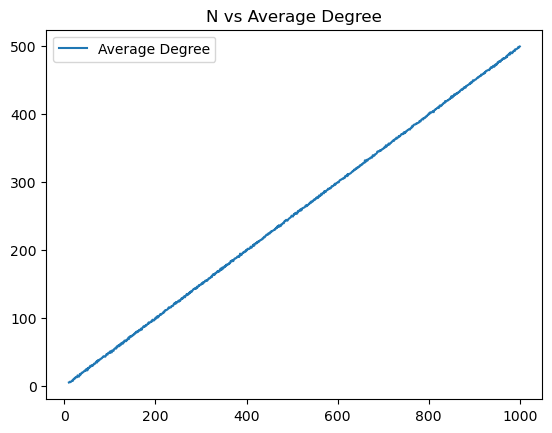

In [24]:
plt.plot(X,average_degrees,label = "Average Degree")
plt.title("N vs Average Degree")
plt.legend()
plt.show()



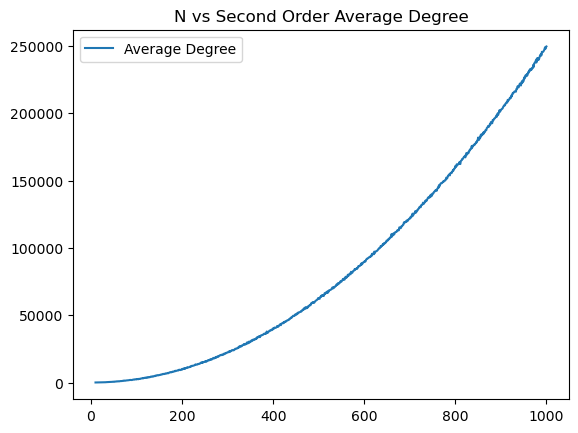

In [25]:
plt.plot(X,second_order_average_degrees,label = "Average Degree")
plt.title("N vs Second Order Average Degree")
plt.legend()
plt.show()

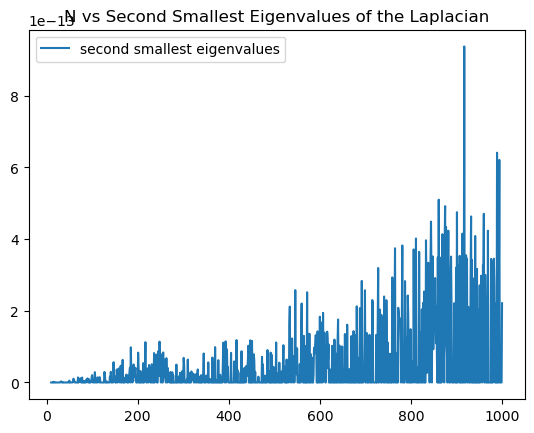

In [37]:
plt.plot(X,second_smallest_eigenvalues,label = "second smallest eigenvalues")
plt.title("N vs Second Smallest Eigenvalues of the Laplacian")
plt.legend()
plt.show()

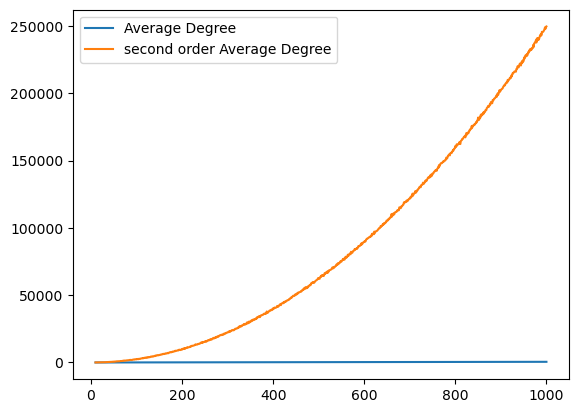

In [22]:
#X.append(1000)
plt.plot(X,average_degrees,label = "Average Degree")
plt.plot(X,second_order_average_degrees,label = "second order Average Degree")
plt.legend()
plt.show()

In [38]:
print(second_smallest_eigenvalues)

[0.0, 1.1102230246251565e-16, 0.0, 0.0, 0.0, 1.7763568394002505e-15, 0.0, 4.440892098500626e-16, 0.0, 6.324750785642058e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.881784197001252e-16, 6.606196764638087e-16, 3.152382753392754e-15, 9.016802411594765e-16, 0.0, 0.0, 1.1179942452141164e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2087699618851544e-15, 6.158705654600051e-16, 0.0, 5.329070518200751e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.3004582192026497e-15, 1.0627468025427165e-14, 8.237439308551702e-15, 2.857552710018747e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.410427102081547e-14, 0.0, 1.2402739182746303e-15, 3.8270591744496296e-15, 1.2013139664345265e-15, 1.1723302343412842e-14, 7.105427357601002e-15, 0.0, 0.0, 1.3792111581302481e-14, 0.0, 0.0, 0.0, 3.440448160296549e-15, 0.0, 3.693904033328789e-15, 0.0, 0.0, 6.96100491695281e-15, 8.445017098233984e-15, 5.698731131583637e-16, 1.1164407020208037e-14, 2.6108561445075775e-15, 0.0, 9.192666347517683e-15, 0.0, 4.14

## Question 3

Node Degree
0 16
1 9
2 10
3 6
4 3
5 4
6 4
7 4
8 5
9 2
10 3
11 1
12 2
13 5
14 2
15 2
16 2
17 2
18 2
19 3
20 2
21 2
22 2
23 5
24 3
25 3
26 2
27 4
28 3
29 4
30 4
31 6
32 12
33 17


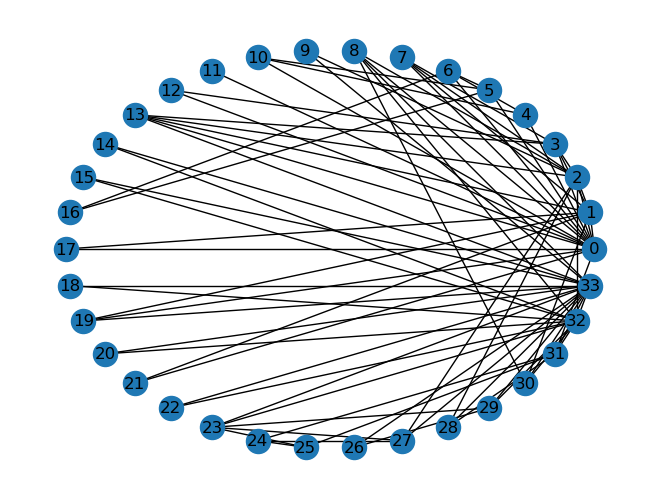

In [40]:
G = nx.karate_club_graph()
print("Node Degree")
for v in G:
    print(f"{v} {G.degree(v)}")

nx.draw_circular(G, with_labels=True)
plt.show()

In [48]:
def compute_centralities(G):
    """ given a networkx graph, compute 
        degree centrality(degree) ,
        normalized_degree_centrality,
        closeness centrality,
        eigenvector centrality,
        node betweenness,
        
        """
    degree_centrality = G.degree
    normalized_degree_centrality = nx.degree_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G)
    closeness_centrality = nx.closeness_centrality(G,wf_improved = False)
    betweenness_centrality = nx.betweenness_centrality(G)
    
    return degree_centrality, normalized_degree_centrality , closeness_centrality , eigenvector_centrality, betweenness_centrality

degree_centrality, normalized_degree_centrality , closeness_centrality , eigenvector_centrality, betweenness_centrality = compute_centralities(G)

        
        

In [65]:
centralities = []
nodes = []
for i in G.nodes:
    nodes.append(i)
    centrality = [degree_centrality[i], normalized_degree_centrality[i] , closeness_centrality[i] , eigenvector_centrality[i], betweenness_centrality[i]]
    centralities.append(centrality)
centralities = np.array(centralities)
nodes = np.array(nodes)


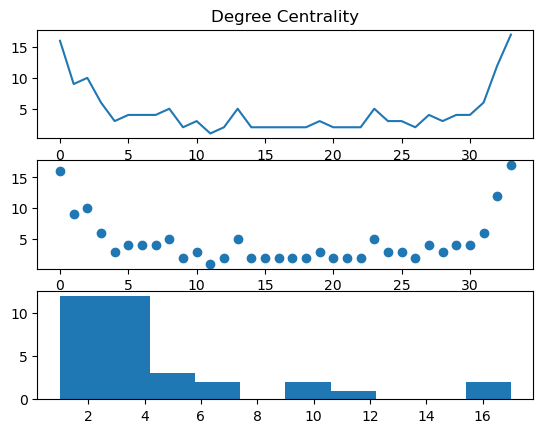

In [76]:
figure, axis = plt.subplots(3, 1)

axis[0].plot(nodes,centralities[:,0])
#axis[0].set_title("degree centralty as plot")
axis[1].scatter(nodes, centralities[:,0])
#axis[1].set_title("degree centralty as scatter plot")
axis[2].hist(centralities[:,0])
axis[0].set_title("Degree Centrality")
#axis[1].set_title("degree centralty as histogram")
plt.show()

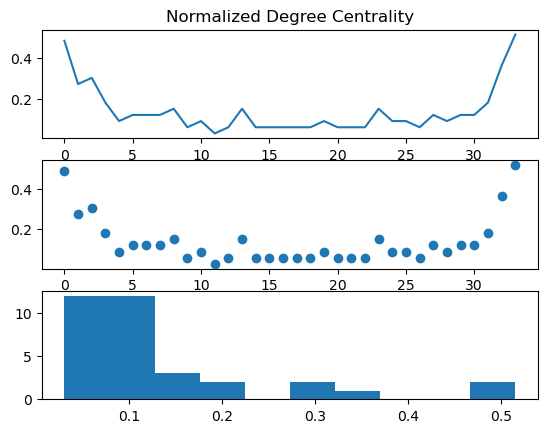

In [77]:
figure, axis = plt.subplots(3, 1)

axis[0].plot(nodes,centralities[:,1])
#axis[0].set_title("degree centralty as plot")
axis[1].scatter(nodes, centralities[:,1])
#axis[1].set_title("degree centralty as scatter plot")
axis[2].hist(centralities[:,1])
axis[0].set_title("Normalized Degree Centrality")
#axis[1].set_title("degree centralty as histogram")
plt.show()

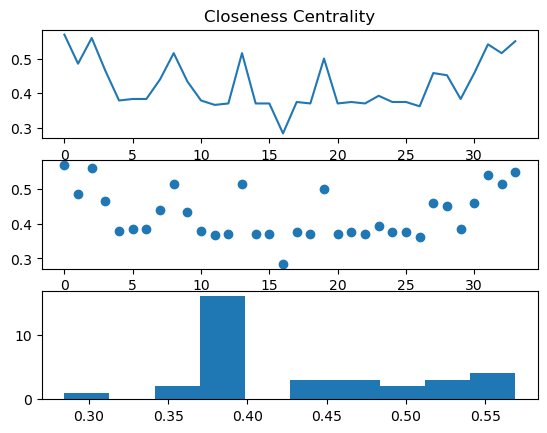

In [78]:
figure, axis = plt.subplots(3, 1)

axis[0].plot(nodes,centralities[:,2])
#axis[0].set_title("degree centralty as plot")
axis[1].scatter(nodes, centralities[:,2])
#axis[1].set_title("degree centralty as scatter plot")
axis[2].hist(centralities[:,2])
axis[0].set_title("Closeness Centrality")
#axis[1].set_title("degree centralty as histogram")
plt.show()

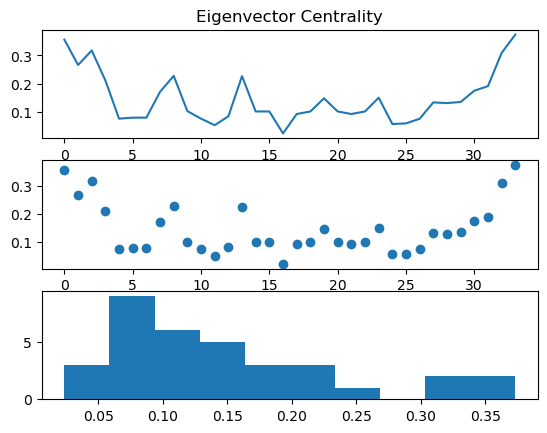

In [79]:
figure, axis = plt.subplots(3, 1)

axis[0].plot(nodes,centralities[:,3])
#axis[0].set_title("degree centralty as plot")
axis[1].scatter(nodes, centralities[:,3])
#axis[1].set_title("degree centralty as scatter plot")
axis[2].hist(centralities[:,3])
axis[0].set_title("Eigenvector Centrality")
#axis[1].set_title("degree centralty as histogram")
plt.show()

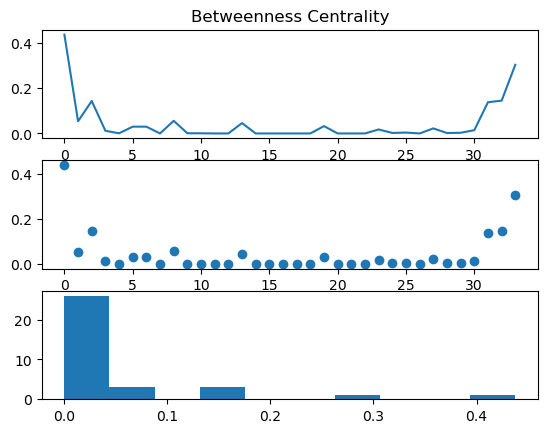

In [80]:
figure, axis = plt.subplots(3, 1)

axis[0].plot(nodes,centralities[:,4])
#axis[0].set_title("degree centralty as plot")
axis[1].scatter(nodes, centralities[:,4])
#axis[1].set_title("degree centralty as scatter plot")
axis[2].hist(centralities[:,4])
axis[0].set_title("Betweenness Centrality")
#axis[1].set_title("degree centralty as histogram")
plt.show()

Text(0.5, 1.0, 'degree vs eigenvector centrality')

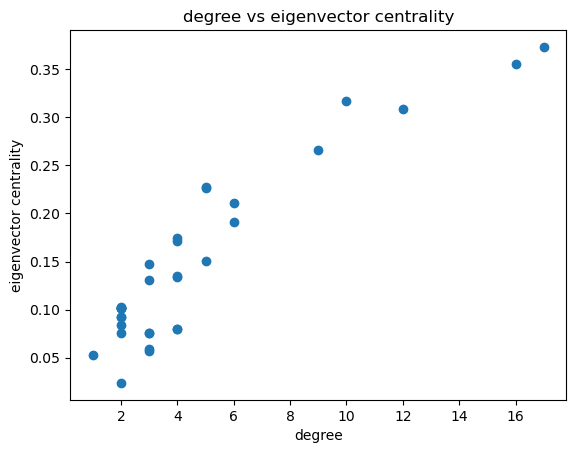

In [83]:
plt.scatter(centralities[:,0],centralities[:,3])
plt.xlabel("degree")
plt.ylabel("eigenvector centrality")
plt.title("degree vs eigenvector centrality")

## Question 4

In [91]:
average_degree = 4
start_n = 10
end_n = 1001
average_clustering_coefficient = []
average_path_lengths = []
X = [i for i in range(start_n, end_n + 1)]
for i in range(start_n, end_n + 1):
    G = nx.random_regular_graph(average_degree,i)
    average_path_length = nx.average_shortest_path_length(G)
    clustering_coeff = nx.clustering(G)
    avg = 0
    size = 0
    for s in G.nodes:
        avg += clustering_coeff[s]
        size += 1
    avg = avg / size
    average_clustering_coefficient.append(avg)
    average_path_lengths.append(average_path_length)
    if i % 100 == 0:
        print("{0} done".format(i))



    


100 done
200 done
300 done
400 done
500 done
600 done
700 done
800 done
900 done
1000 done


Text(0.5, 1.0, 'N Vs Average Path Length for d = 4')

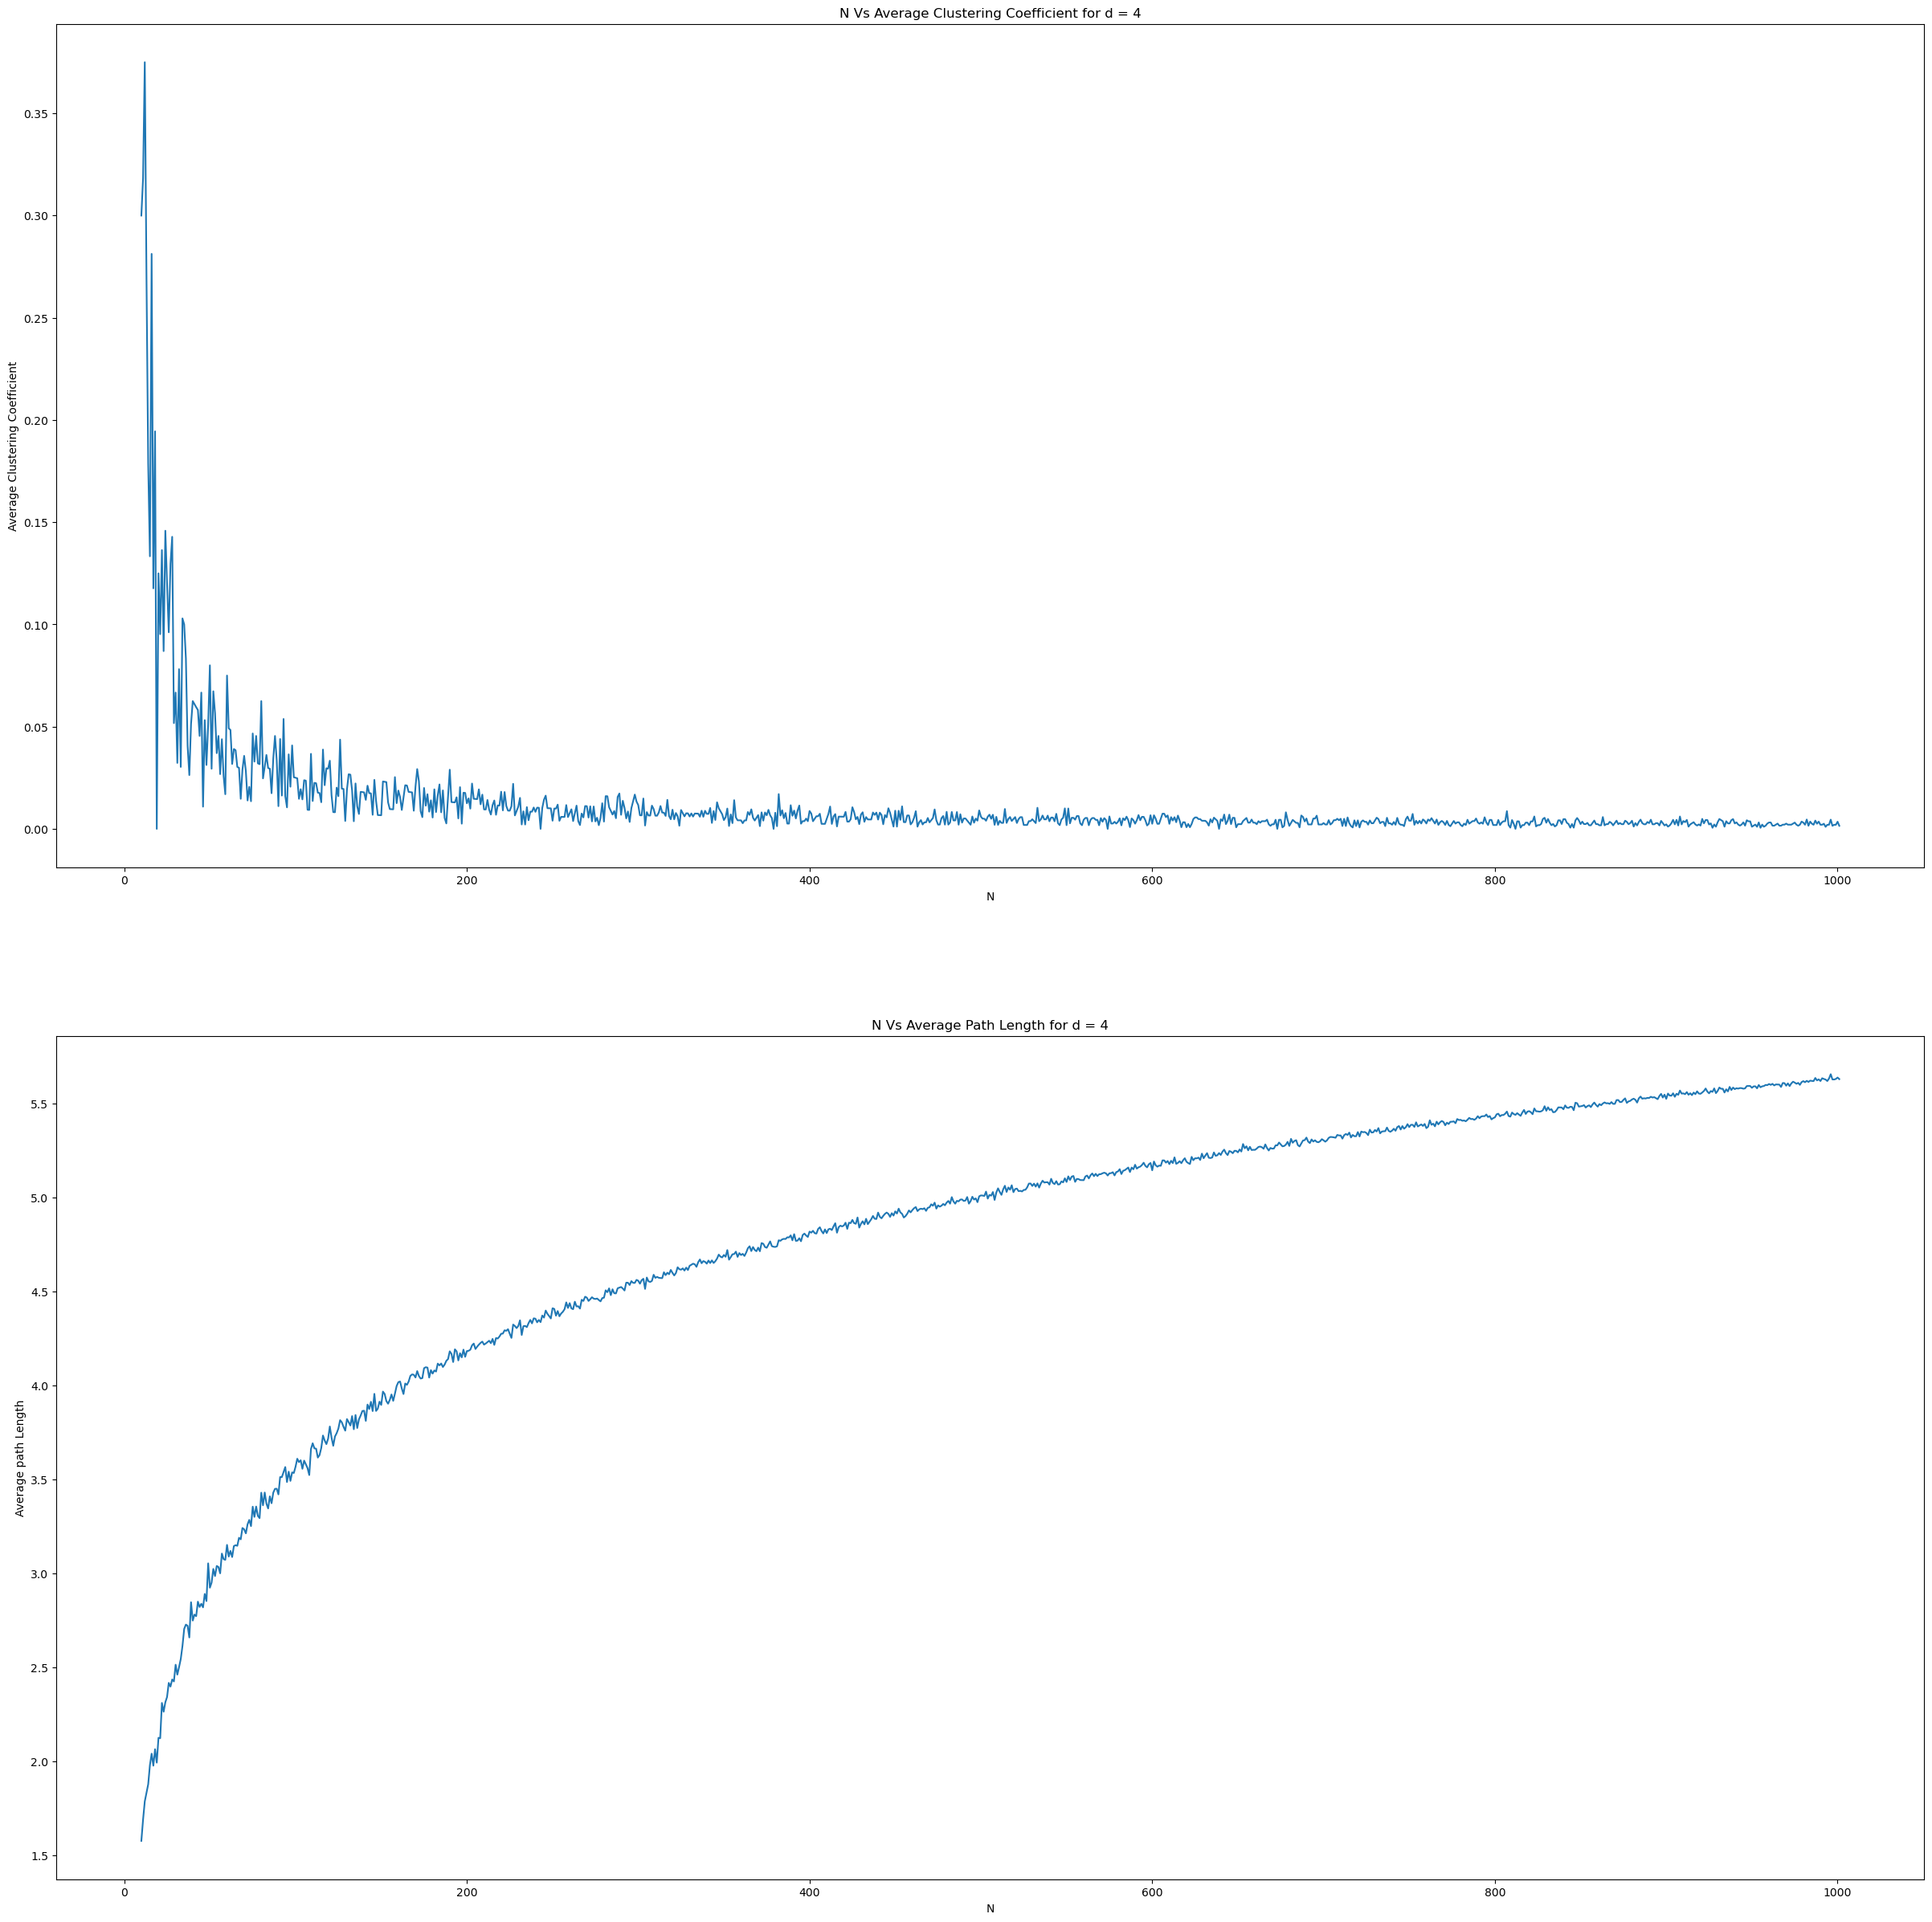

In [92]:
fig = plt.figure(figsize = (30,30))
fig.add_subplot(2,1,1)
plt.plot(X,average_clustering_coefficient)
plt.xlabel("N")
plt.ylabel("Average Clustering Coefficient")
plt.title("N Vs Average Clustering Coefficient for d = 4")
fig.add_subplot(2,1,2)
plt.plot(X,average_path_lengths)
plt.xlabel("N")
plt.ylabel("Average path Length")
plt.title("N Vs Average Path Length for d = 4")

In [93]:
average_degree_2 = 8
start_n = 10
end_n = 1001
average_clustering_coefficient_2 = []
average_path_lengths_2 = []
X = [i for i in range(start_n, end_n + 1)]
for i in range(start_n, end_n + 1):
    G = nx.random_regular_graph(average_degree_2,i)
    average_path_length = nx.average_shortest_path_length(G)
    clustering_coeff = nx.clustering(G)
    avg = 0
    size = 0
    for s in G.nodes:
        avg += clustering_coeff[s]
        size += 1
    avg = avg / size
    average_clustering_coefficient_2.append(avg)
    average_path_lengths_2.append(average_path_length)
    if i % 100 == 0:
        print("{0} done".format(i))



100 done
200 done
300 done
400 done
500 done
600 done
700 done
800 done
900 done
1000 done


Text(0.5, 1.0, 'N Vs Average Path Length for d = 8')

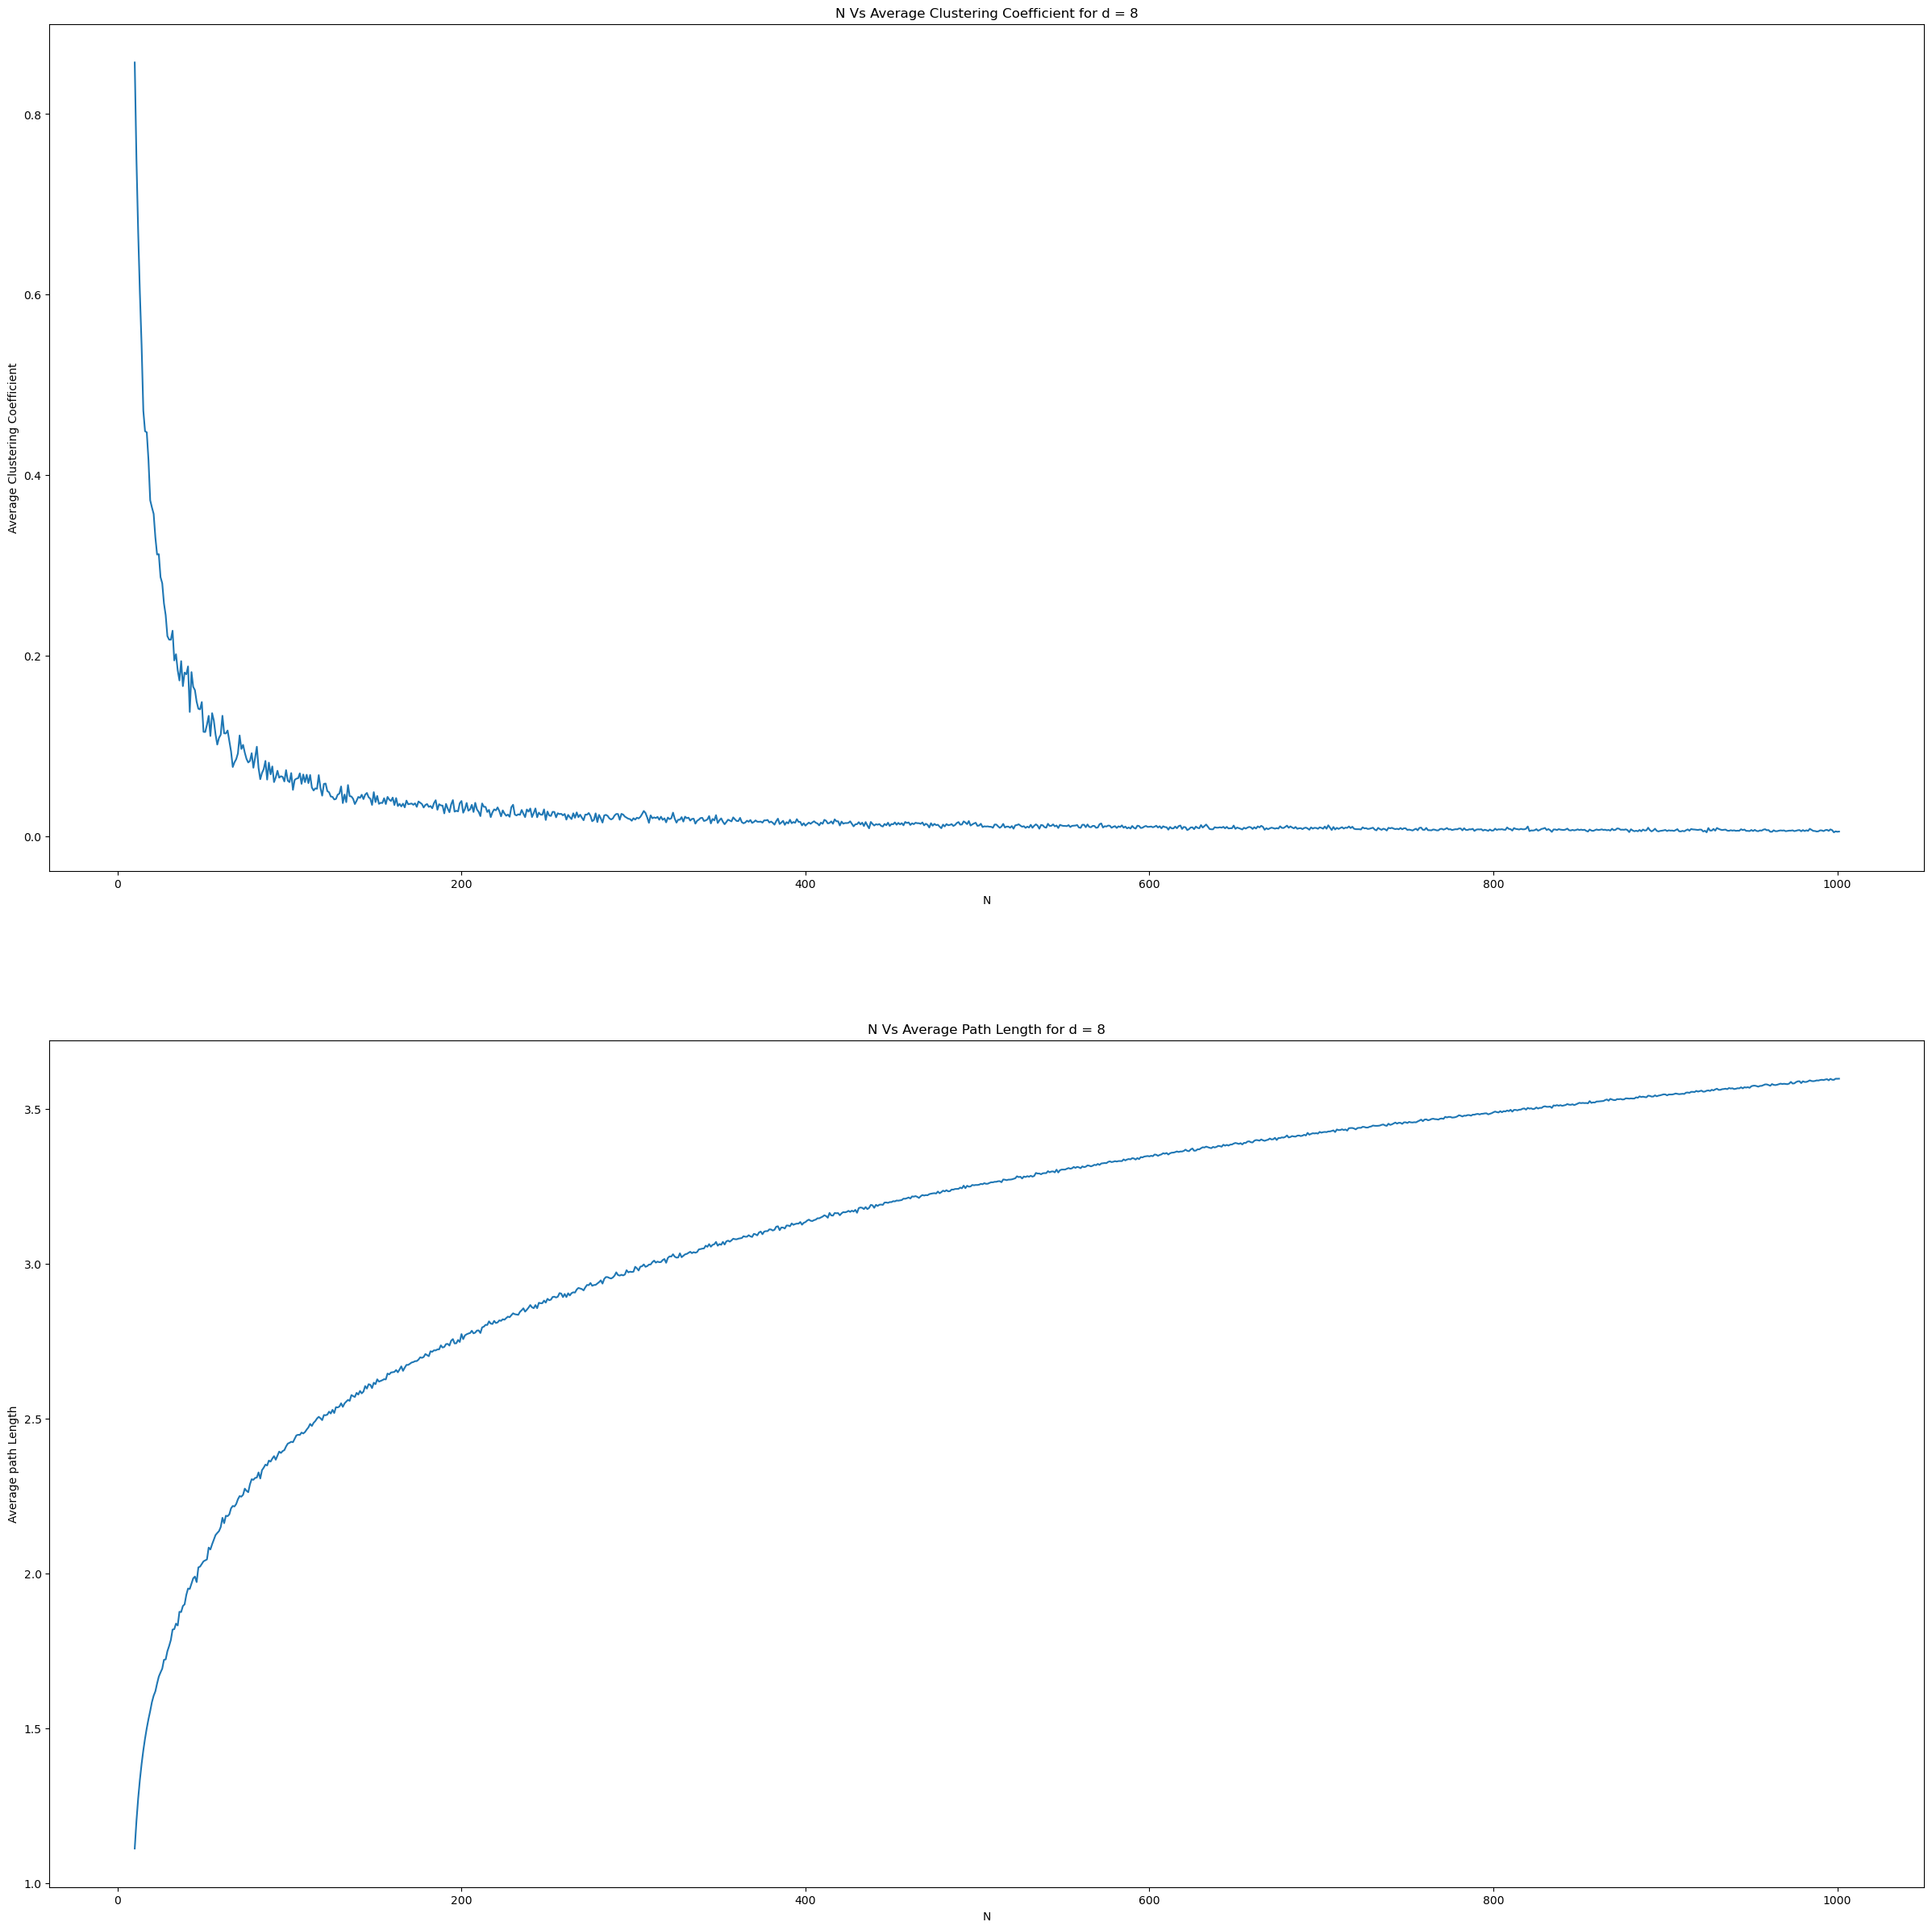

In [95]:
fig = plt.figure(figsize = (30,30))
fig.add_subplot(2,1,1)
plt.plot(X,average_clustering_coefficient_2)
plt.xlabel("N")
plt.ylabel("Average Clustering Coefficient")
plt.title("N Vs Average Clustering Coefficient for d = 8")
fig.add_subplot(2,1,2)
plt.plot(X,average_path_lengths_2)
plt.xlabel("N")
plt.ylabel("Average path Length")
plt.title("N Vs Average Path Length for d = 8")